
Training the model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9110 - loss: 0.2977 - val_accuracy: 0.9835 - val_loss: 0.0488
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9871 - loss: 0.0413 - val_accuracy: 0.9869 - val_loss: 0.0406
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.9905 - loss: 0.0300 - val_accuracy: 0.9893 - val_loss: 0.0292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9946 - loss: 0.0182 - val_accuracy: 0.9891 - val_loss: 0.0319
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9957 - loss: 0.0128 - val_accuracy: 0.9901 - val_loss: 0.0317
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9856 - loss: 0.0429

✅ Model Test Accuracy: 99.01%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

Random test set predictions (Actual | Predicted):


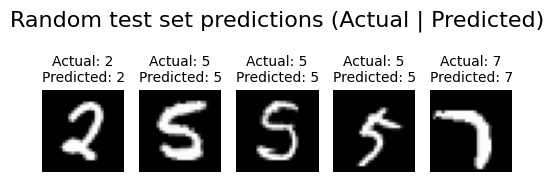


Do you want to upload your own digit image for prediction? (yes/no): yes
Upload your file in the file picker:


Saving sample check.jpg to sample check (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

 Predicted Digit from Custom Image: 6


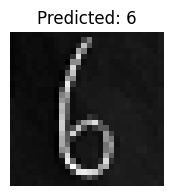

Want to predict another image? (yes/no): no
Thanks for using the digit recognizer! Exiting upload mode.


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Preprocessing
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 3. Model Building
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for digits 0–9
])

# 4. Compiling
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the model
print("\nTraining the model...")
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 6. Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\n✅ Model Test Accuracy: {test_accuracy * 100:.2f}%")

# 7. Prediction on test images
predictions = model.predict(x_test)

def display_multiple_predictions(idxs):
    n = len(idxs)
    plt.figure(figsize=(1 * n, 2))
    plt.suptitle("Random test set predictions (Actual | Predicted)", fontsize=16)
    for i, idx in enumerate(idxs):
        plt.subplot(1, n, i+1)
        plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        actual = y_test[idx]
        predicted = np.argmax(predictions[idx])
        plt.title(f"Actual: {actual}\nPredicted: {predicted}", fontsize=10)
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.90])
    plt.show(block=False)
    plt.pause(5)
    plt.close()

print("\nRandom test set predictions (Actual | Predicted):")
test_idxs = np.random.choice(len(x_test), 5, replace=False)
display_multiple_predictions(test_idxs)

# 8. Prediction on custom images
def predict_custom_image(image_path):
    try:
        img = Image.open(image_path).convert('L')
        img = img.resize((28, 28))
        img_array = np.array(img)

        if np.mean(img_array) > 127:
            img_array = 255 - img_array

        img_array = img_array / 255.0
        img_array = img_array.reshape(1, 28, 28, 1)

        prediction = model.predict(img_array)
        predicted_digit = np.argmax(prediction)
        print(f"\n Predicted Digit from Custom Image: {predicted_digit}")
        plt.figure(figsize=(2, 2))
        plt.imshow(img_array.reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {predicted_digit}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error loading image: {e}")

# Image Upload
def get_user_image():
    try:
        from google.colab import files
        uploaded = files.upload()
        for fn in uploaded:
            return fn
    except ImportError:
        import tkinter as tk
        from tkinter import filedialog
        import os
        root = tk.Tk()
        root.withdraw()
        file_path = filedialog.askopenfilename(
            title="Select digit image",
            filetypes=[("Image files", "*.png;*.jpg;*.jpeg")]
        )
        if file_path:
            return file_path
    return None

# Upload Loop
while True:
    user_prompt = input("\nDo you want to upload your own digit image for prediction? (yes/no): ").strip().lower()
    if user_prompt in ['yes', 'y']:
        while True:
            print("Upload your file in the file picker:")
            image_path = get_user_image()
            if image_path:
                predict_custom_image(image_path)
                another = input("Want to predict another image? (yes/no): ").strip().lower()
                if another not in ['yes', 'y']:
                    print("Thanks for using the digit recognizer! Exiting upload mode.")
                    break
            else:
                print("No image uploaded or invalid file. Try again.")
        break
    elif user_prompt in ['no', 'n']:
        print("Working finished. Thanks for using the digit recognizer!!")
        break
    else:
        print("Please answer 'yes' or 'no'.")
